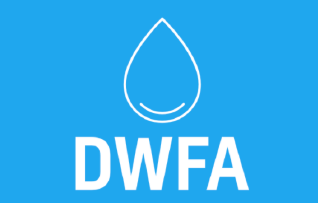

In [27]:
# import librairies needed for project
import missingno as msno
import numpy as np
import pandas as pd

# import user-created functions
# from functions import *

# maximise dataframe display
pd.set_option('display.max_colwidth', None)

# remove scientific notation format for large numbers in dataframes
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# # use company logo colour in graphs
# col = findColor('dwfa_blue.png')
# print("Logo color hex:", col)

In [28]:
## Importing required modules
import glob
import random
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import lightgbm as lgb
import geopandas as gpd
import plotly.express as px
from scipy.stats import skew
from unidecode import unidecode
import matplotlib.pyplot as plt
from fuzzywuzzy import process as fwp
import plotly.graph_objects as go
from shapely.geometry import Polygon
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
# from dataprep.eda import plot, plot_missing, plot_correlation, create_report
import seaborn as sns
import matplotlib.pyplot as plt

deprecate positional args: graphviz.backend.piping.pipe(['renderer', 'formatter', 'neato_no_op', 'quiet'])
deprecate positional args: graphviz.backend.rendering.render(['renderer', 'formatter', 'neato_no_op', 'quiet'])
deprecate positional args: graphviz.backend.unflattening.unflatten(['stagger', 'fanout', 'chain', 'encoding'])
deprecate positional args: graphviz.backend.viewing.view(['quiet'])
deprecate positional args: graphviz.quoting.quote(['is_html_string', 'is_valid_id', 'dot_keywords', 'endswith_odd_number_of_backslashes', 'escape_unescaped_quotes'])
deprecate positional args: graphviz.quoting.a_list(['kwargs', 'attributes'])
deprecate positional args: graphviz.quoting.attr_list(['kwargs', 'attributes'])
deprecate positional args: graphviz.dot.Dot.clear(['keep_attrs'])
deprecate positional args: graphviz.dot.Dot.__iter__(['subgraph'])
deprecate positional args: graphviz.dot.Dot.node(['_attributes'])
deprecate positional args: graphviz.dot.Dot.edge(['_attributes'])
deprecate posi

### 1 - RegionCountry

In [2]:
# import file - source : 
# countries = pd.read_csv('countries.csv', encoding='latin_1')
RegionCountry = pd.read_csv('RESSOURCES/RegionCountry.csv',sep=",")
RegionCountry.describe()

,REGION (DISPLAY),COUNTRY (DISPLAY)
count,194,194
unique,6,194
top,Europe,Albania
freq,53,1


<Axes: >

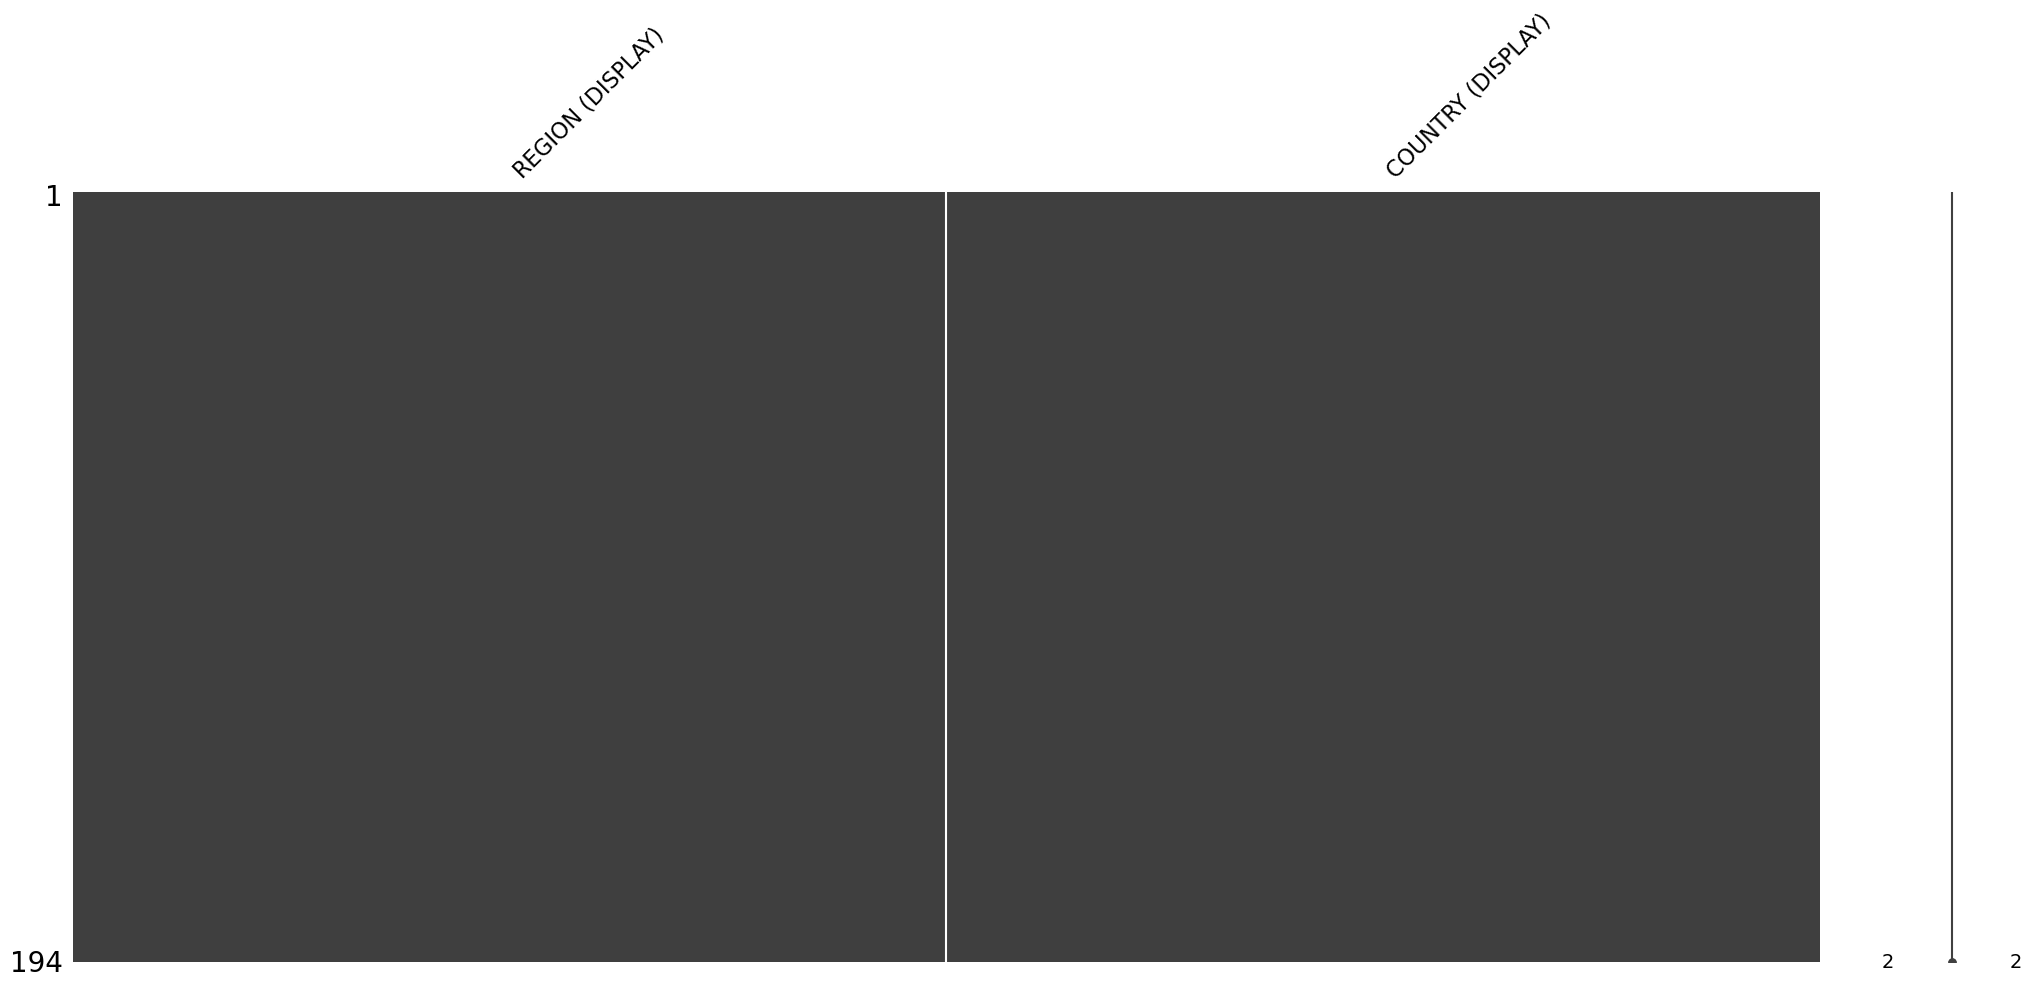

In [3]:
msno.matrix(RegionCountry)

In [4]:
# count number of null values in RegionCountry dataframe
nulls_c = RegionCountry.isna().sum().sum()
if nulls_c == 0:
    print("There are no null values in the table.")
else:
    print ("There are ", nulls_c, "null values in the table.")

There are no null values in the table.


In [5]:
# rename columns
RegionCountry.rename(columns={'REGION (DISPLAY)': 'region', 'COUNTRY (DISPLAY)':'country_name'}, inplace=True)

In [6]:
# type casting
RegionCountry['country_name'] = RegionCountry['country_name'].astype('string')
RegionCountry['region'] = RegionCountry['region'].astype('string')

In [7]:
print ("Il y a",RegionCountry['country_name'].nunique(), "pays dans la liste.")
if (RegionCountry.loc[RegionCountry.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 194 pays dans la liste.
Aucun doublon dans la table.


In [10]:
# reorder columns to set primary key as first column
RegionCountry_final = RegionCountry[['country_name','region']].copy()

In [18]:
# export df to csv file
RegionCountry_final.to_csv("RESULTATS/RegionCountry_final.csv", index=False,encoding='utf-8-sig')

## 2 - PoliticalStability

In [12]:
# import file - source : 
PoliticalStability = pd.read_csv('RESSOURCES/PoliticalStability.csv',sep=",")
PoliticalStability.describe()

,Year,Political_Stability
count,3526.000000,3526.000000
mean,2009.521838,-0.051044
std,5.255833,0.996039
min,2000.000000,-3.310000
25%,2005.000000,-0.710000
50%,2010.000000,0.050000
75%,2014.000000,0.797500
max,2018.000000,1.970000


<Axes: >

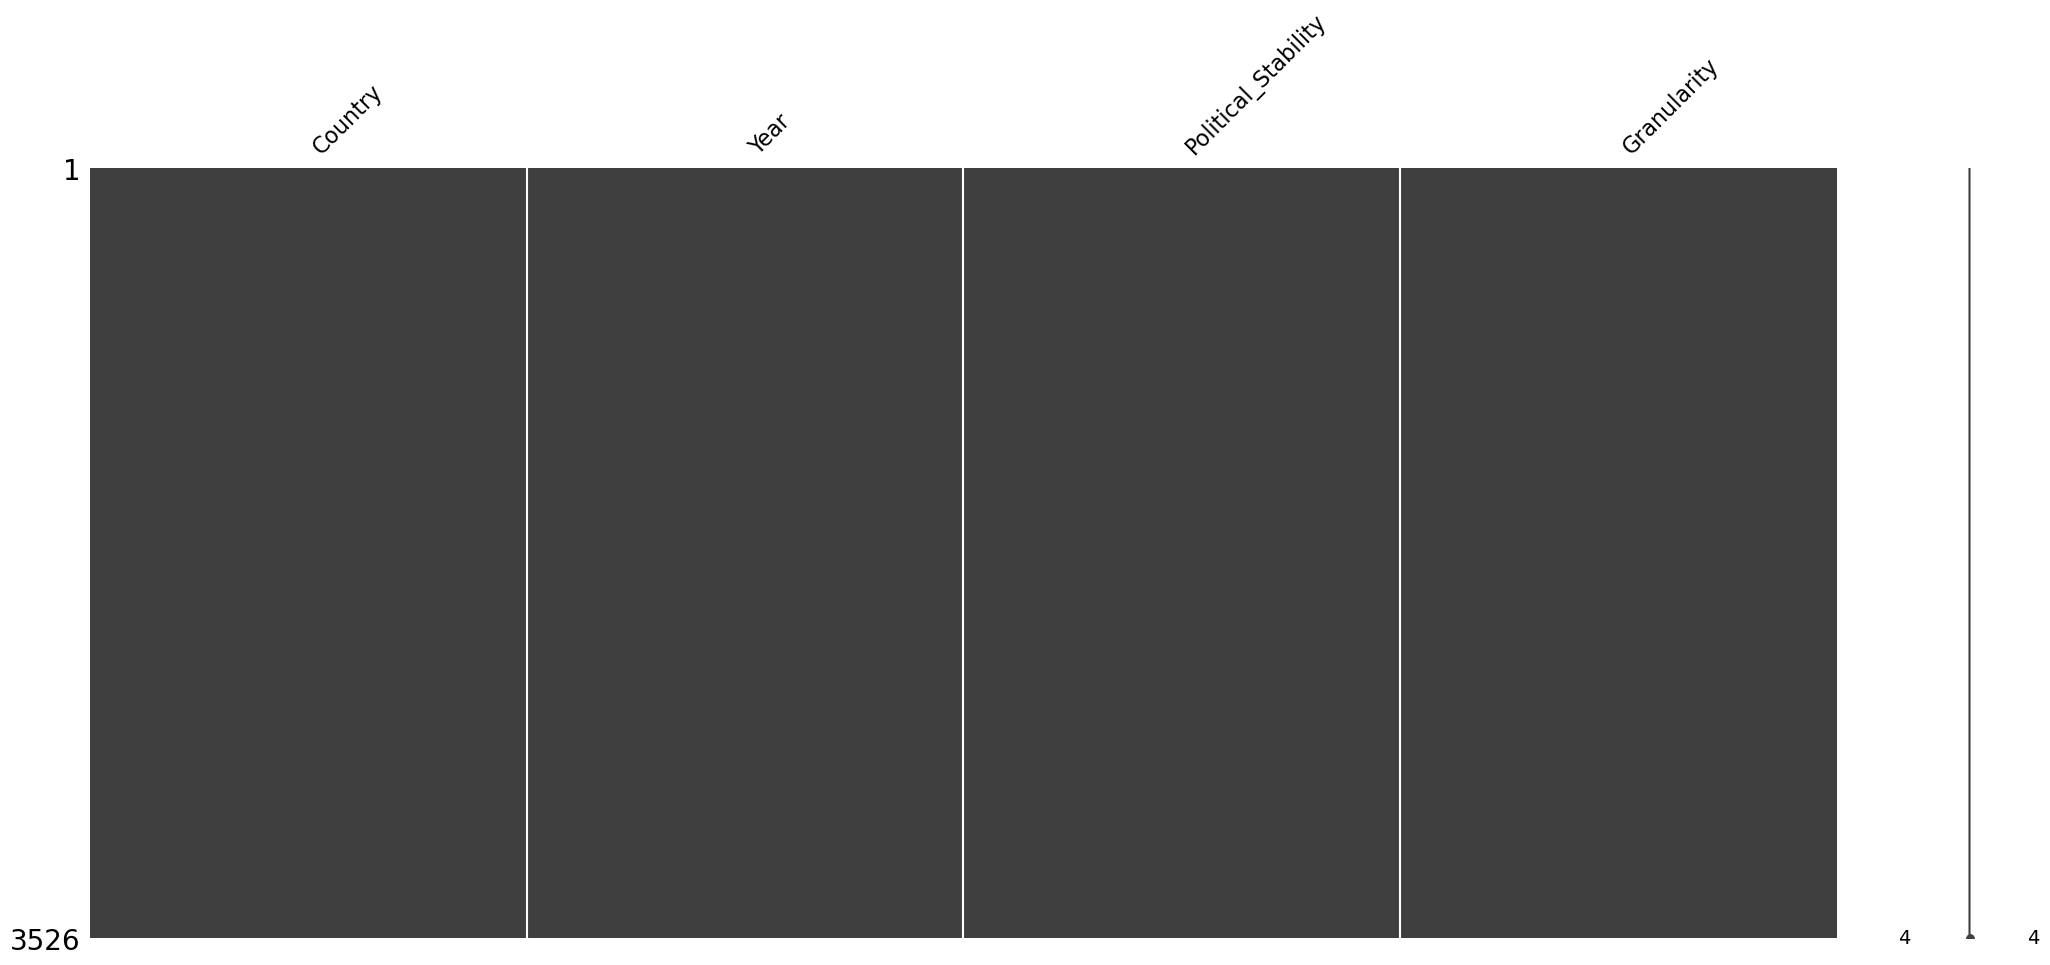

In [13]:
msno.matrix(PoliticalStability)

In [14]:
# count number of null values in countries dataframe
nulls_ps = PoliticalStability.isna().sum().sum()
if nulls_ps == 0:
    print("There are no null values in the table.")
else:
    print ("There are ", nulls_ps, "null values in the table.")

There are no null values in the table.


In [15]:
# rename columns
PoliticalStability.rename(columns={'Country': 'ps_country_name', 'Year':'ps_year', 'Political_Stability':'political_stability'}, inplace=True)

In [16]:
# type casting
PoliticalStability['ps_country_name'] = PoliticalStability['ps_country_name'].astype('string')
PoliticalStability['ps_year'] = PoliticalStability['ps_year'].astype('int')
PoliticalStability['political_stability'] = PoliticalStability['political_stability'].astype('float')

In [17]:
print ("Il y a",PoliticalStability['ps_country_name'].nunique(), "pays dans la liste.")
if (PoliticalStability.loc[PoliticalStability.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 200 pays dans la liste.
Aucun doublon dans la table.


In [41]:
import pandas as pd

def find_missing_countries(stability_df, reference_df, stability_column, reference_column):
    """
    Trouve les pays ayant un indice dans le dataframe stability_df mais absents dans le dataframe reference_df.
    
    Parameters:
    - stability_df (pd.DataFrame): DataFrame contenant les données de stabilité politique.
    - reference_df (pd.DataFrame): DataFrame contenant les données de référence des pays.
    - stability_column (str): Nom de la colonne dans stability_df contenant les noms des pays.
    - reference_column (str): Nom de la colonne dans reference_df contenant les noms des pays.
    
    Returns:
    - list: Liste des pays présents dans stability_df mais absents dans reference_df.
    """
    # Liste des pays dans chaque DataFrame
    stability_countries = stability_df[stability_column].unique().tolist()
    reference_countries = reference_df[reference_column].unique().tolist()

    # Pays présents dans stability_df mais absents dans reference_df
    missing_countries = [country for country in stability_countries if country not in reference_countries]
    
    return missing_countries

In [42]:
# Exemple d'utilisation :
# Supposons que PoliticalStability et RegionCountry soient deux DataFrames pandas que vous avez déjà chargés

missing_countries = find_missing_countries(PoliticalStability, RegionCountry, 'ps_country_name', 'country_name')
print("Pays ayant un indice de stabilité politique mais absents du référentiel des pays:")
print(missing_countries)

Pays ayant un indice de stabilité politique mais absents du référentiel des pays:
['American Samoa', 'Bermuda', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of', 'Greenland', 'North Macedonia', 'Palestine', 'Puerto Rico']


In [44]:
# Exemple d'utilisation :
# Supposons que PoliticalStability et RegionCountry soient deux DataFrames pandas que vous avez déjà chargés

missing_countries = find_missing_countries(RegionCountry, PoliticalStability, 'country_name','ps_country_name')
print("Pays du referentiel n'ayant pas d'indice de stabilite politique:")
print(missing_countries)

Pays du referentiel n'ayant pas d'indice de stabilite politique:
['China', 'Monaco', 'Republic of North Macedonia', 'San Marino']


In [45]:
# replace China, mainland with its correct name in countries list
PoliticalStability.loc[(PoliticalStability['ps_country_name'] == 'China, mainland'), 'ps_country_name'] = 'China'

In [46]:
# Exemple d'utilisation :
# Supposons que PoliticalStability et RegionCountry soient deux DataFrames pandas que vous avez déjà chargés

missing_countries = find_missing_countries(RegionCountry, PoliticalStability, 'country_name','ps_country_name')
print("Pays du referentiel n'ayant pas d'indice de stabilite politique:")
print(missing_countries)

Pays du referentiel n'ayant pas d'indice de stabilite politique:
['Monaco', 'Republic of North Macedonia', 'San Marino']


In [48]:
# Exemple d'utilisation :
# Supposons que PoliticalStability et RegionCountry soient deux DataFrames pandas que vous avez déjà chargés

missing_countries = find_missing_countries(PoliticalStability, RegionCountry, 'ps_country_name', 'country_name')
countries_out = missing_countries
print("Pays ayant un indice de stabilité politique mais absents du référentiel des pays:")
print(countries_out)

Pays ayant un indice de stabilité politique mais absents du référentiel des pays:
['American Samoa', 'Bermuda', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'Greenland', 'North Macedonia', 'Palestine', 'Puerto Rico']


In [49]:
# remove countries for which political stability index is missing
PoliticalStability_trim = PoliticalStability.loc[(PoliticalStability['ps_country_name'].isin(countries_out) == False)].copy()

In [52]:
# reorder columns to set primary key as first column
PoliticalStability_final = PoliticalStability_trim[['ps_country_name', 'ps_year','political_stability']].copy()

In [54]:
PoliticalStability_final.to_csv("RESULTATS/PoliticalStability_final.csv", index=False,encoding='utf-8-sig')

## 3 - Population

In [61]:
# import file - source : 
Population = pd.read_csv('RESSOURCES/Population.csv',sep=",")
Population.describe()

,Year,Population
count,20914.000,20914.000
mean,2009.047,22531.641
std,5.479,100016.851
min,2000.000,0.000
25%,2004.000,348.346
50%,2009.000,3016.337
75%,2014.000,11150.426
max,2018.000,1459377.612


In [62]:
# change units
Population['Population_Million'] = Population['Population'] * 1000

<Axes: >

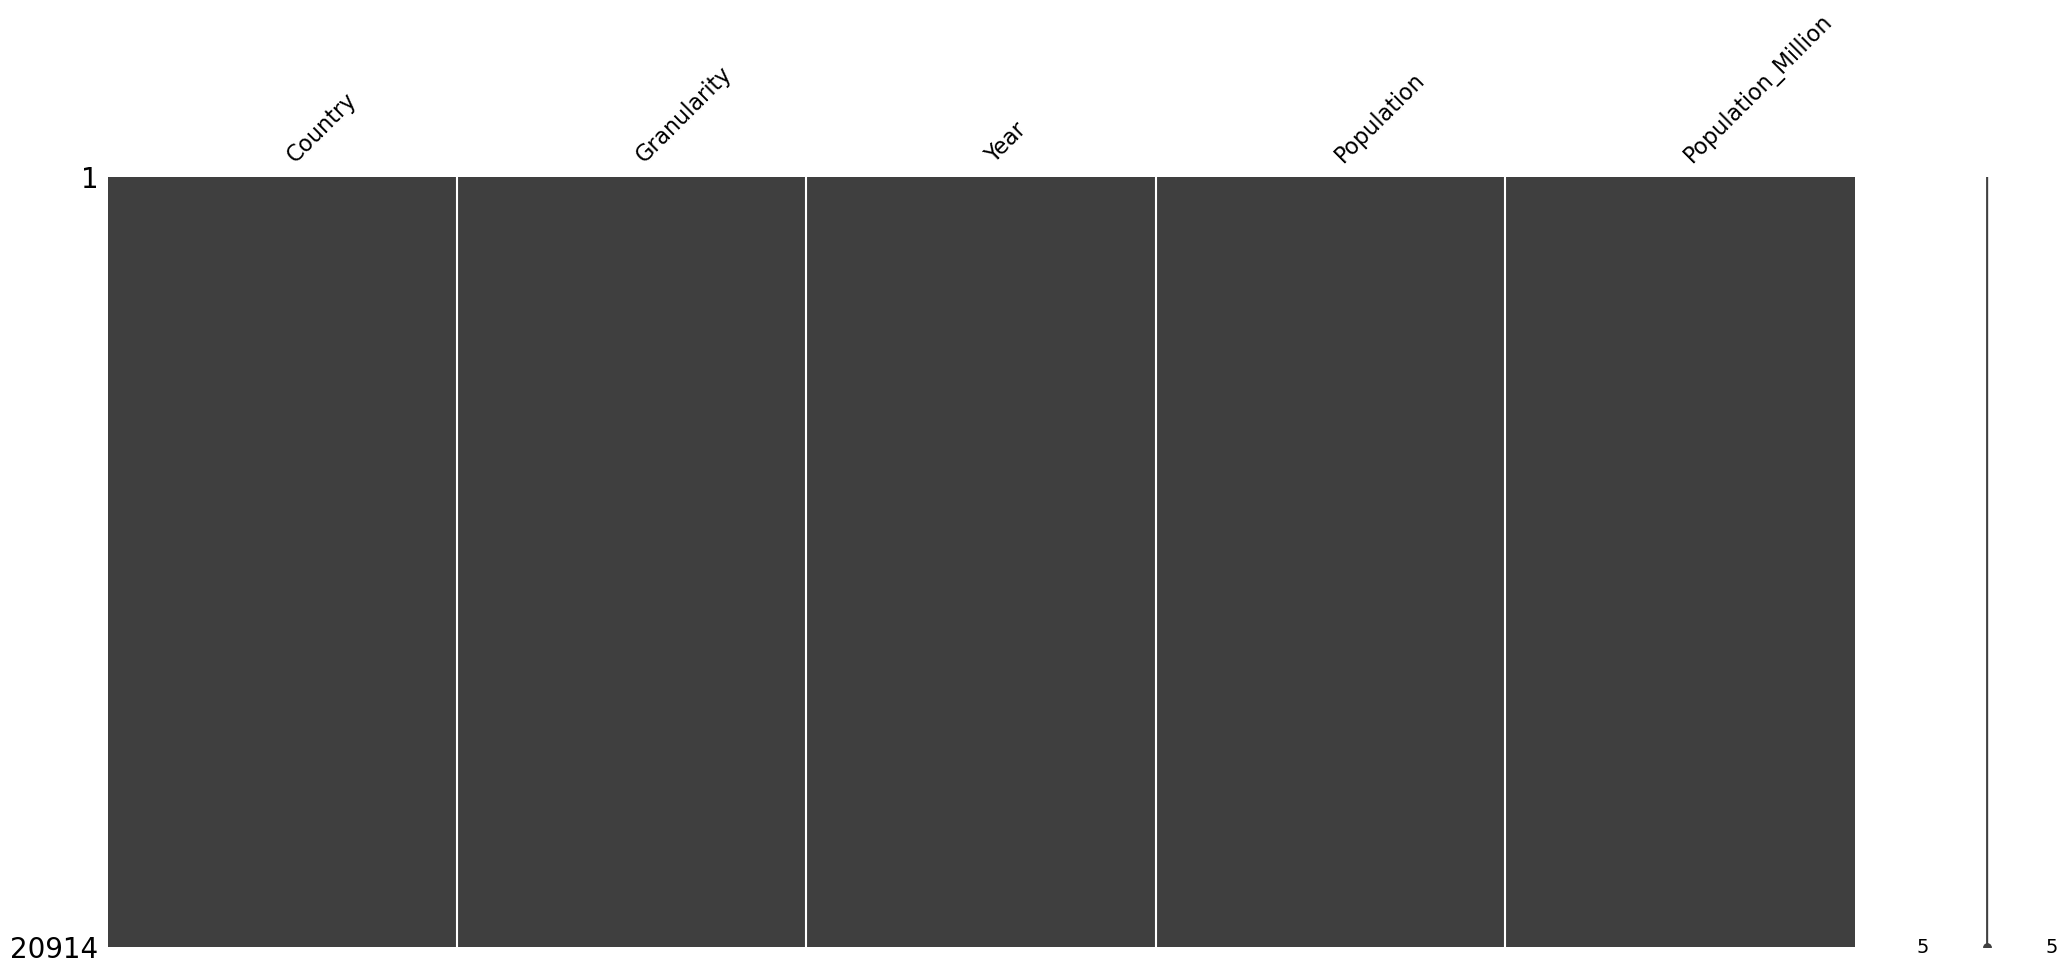

In [63]:
msno.matrix(Population)

In [64]:
# count number of null values in countries dataframe
nulls_Population = Population.isna().sum().sum()
if nulls_Population == 0:
    print("There are no null values in the table.")
else:
    print ("There are ", nulls_Population, "null values in the table.")

There are no null values in the table.


In [65]:
# un-pivot data
Population_trim = Population.pivot(index=['Country','Year'], columns='Granularity', values='Population_Million').reset_index()
Population_trim.head()

Granularity,Country,Year,Female,Male,Rural,Total,Urban
0,Afghanistan,2000,10090449.000,10689508.000,15657474.000,20779953.000,4436282.000
1,Afghanistan,2001,10489238.000,11117754.000,16318324.000,21606988.000,4648139.000
2,Afghanistan,2002,10958668.000,11642106.000,17086910.000,22600770.000,4893013.000
3,Afghanistan,2003,11466237.000,12214634.000,17909063.000,23680871.000,5155788.000
4,Afghanistan,2004,11962963.000,12763726.000,18692107.000,24726684.000,5426872.000


In [68]:
# change units
Population_trim['female_population'] = Population_trim['Female']
Population_trim['male_population'] = Population_trim['Male']
Population_trim['rural_population'] = Population_trim['Rural']
Population_trim['urban_population'] = Population_trim['Urban']
Population_trim.rename(columns={'Country': 'p_country_name', 'Year':'p_year'}, inplace=True)

In [70]:
# reorder columns
Population = Population_trim[['p_country_name', 'p_year', 'female_population','male_population','rural_population','urban_population']].copy()

In [71]:
missing_countries = find_missing_countries(Population, RegionCountry, 'p_country_name', 'country_name')
countries_out_2 = missing_countries
print("Pays ayant des donnees de population mais absents du referentiel pays:")
print(countries_out_2)

Pays ayant des donnees de population mais absents du referentiel pays:
['American Samoa', 'Anguilla', 'Aruba', 'Bermuda', 'Bonaire, Sint Eustatius and Saba', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland', 'Curaçao', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guyana', 'French Polynesia', 'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Holy See', 'Isle of Man', 'Liechtenstein', 'Martinique', 'Mayotte', 'Montserrat', 'Netherlands Antilles (former)', 'New Caledonia', 'North Macedonia', 'Northern Mariana Islands', 'Palestine', 'Puerto Rico', 'Réunion', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Pierre and Miquelon', 'Saint-Martin (French part)', 'Serbia and Montenegro', 'Sint Maarten  (Dutch part)', 'Sudan (former)', 'Tokelau', 'Turks and Caicos Islands', 'United States Virgin Islands', 'Wallis and Futuna Islands', 'Western Sahara']


In [72]:
missing_countries = find_missing_countries(RegionCountry, Population, 'country_name', 'p_country_name')
countries_out_3 = missing_countries
print("Pays du referentiel n'ayant pas de donnees de population:")
print(countries_out_3)

Pays du referentiel n'ayant pas de donnees de population:
['Republic of North Macedonia']


In [74]:
nulls_pop = Population[Population.isnull().any(axis=1)]
countries_out_4 = nulls_pop['p_country_name'].unique()
print(countries_out_4)

['American Samoa' 'Andorra' 'Anguilla' 'Bermuda'
 'Bonaire, Sint Eustatius and Saba' 'British Virgin Islands'
 'Cayman Islands' 'Cook Islands' 'Dominica' 'Falkland Islands (Malvinas)'
 'Faroe Islands' 'Gibraltar' 'Greenland' 'Holy See' 'Isle of Man'
 'Liechtenstein' 'Marshall Islands' 'Monaco' 'Montserrat' 'Nauru' 'Niue'
 'Northern Mariana Islands' 'Palau' 'Saint Barthélemy'
 'Saint Helena, Ascension and Tristan da Cunha' 'Saint Kitts and Nevis'
 'Saint Pierre and Miquelon' 'Saint-Martin (French part)' 'San Marino'
 'Sint Maarten  (Dutch part)' 'Tokelau' 'Turks and Caicos Islands'
 'Tuvalu' 'Wallis and Futuna Islands']


In [76]:
# remove countries which have missing data or are overseas territories of another country
Population_final = Population.loc[(Population['p_country_name'].isin(countries_out_2) == False)
                                 & (Population['p_country_name'].isin(countries_out_4) == False)].copy()

In [80]:
missing_countries = find_missing_countries(RegionCountry, Population_final, 'country_name', 'p_country_name')
missing_countries

['Andorra',
 'Monaco',
 'Niue',
 'Republic of North Macedonia',
 'San Marino',
 'Tuvalu',
 'Cook Islands',
 'Dominica',
 'Marshall Islands',
 'Nauru',
 'Palau',
 'Saint Kitts and Nevis']

In [81]:
missing_countries = find_missing_countries( Population_final,RegionCountry, 'p_country_name' ,'country_name')
missing_countries

[]

In [82]:
# type casting
Population_final['p_country_name'] = Population_final['p_country_name'].astype('string')
Population_final['p_year'] = Population_final['p_year'].astype('int')
Population_final['female_population'] = Population_final['female_population'].astype('int')
Population_final['male_population'] = Population_final['male_population'].astype('int')
Population_final['rural_population'] = Population_final['rural_population'].astype('int')
Population_final['urban_population'] = Population_final['urban_population'].astype('int')

In [83]:
# export df to csv file
Population_final.to_csv("RESULTATS/Population_final.csv", index=False,encoding='utf-8-sig')

## 4 - BasicAndSafelyManagedDrinkingWaterServices

In [121]:
# import file - source : 
BasicAndSafelyManagedDrinkingWaterServices = pd.read_csv('RESSOURCES/BasicAndSafelyManagedDrinkingWaterServices.csv',sep=",")
BasicAndSafelyManagedDrinkingWaterServices.describe()

,Year,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
count,10476.000,9415.000,3286.000
mean,2008.500,83.962,66.071
std,5.188,19.968,30.384
min,2000.000,4.083,0.000
25%,2004.000,75.928,41.896
50%,2008.500,93.115,73.967
75%,2013.000,98.954,94.777
max,2017.000,100.000,100.000


<Axes: >

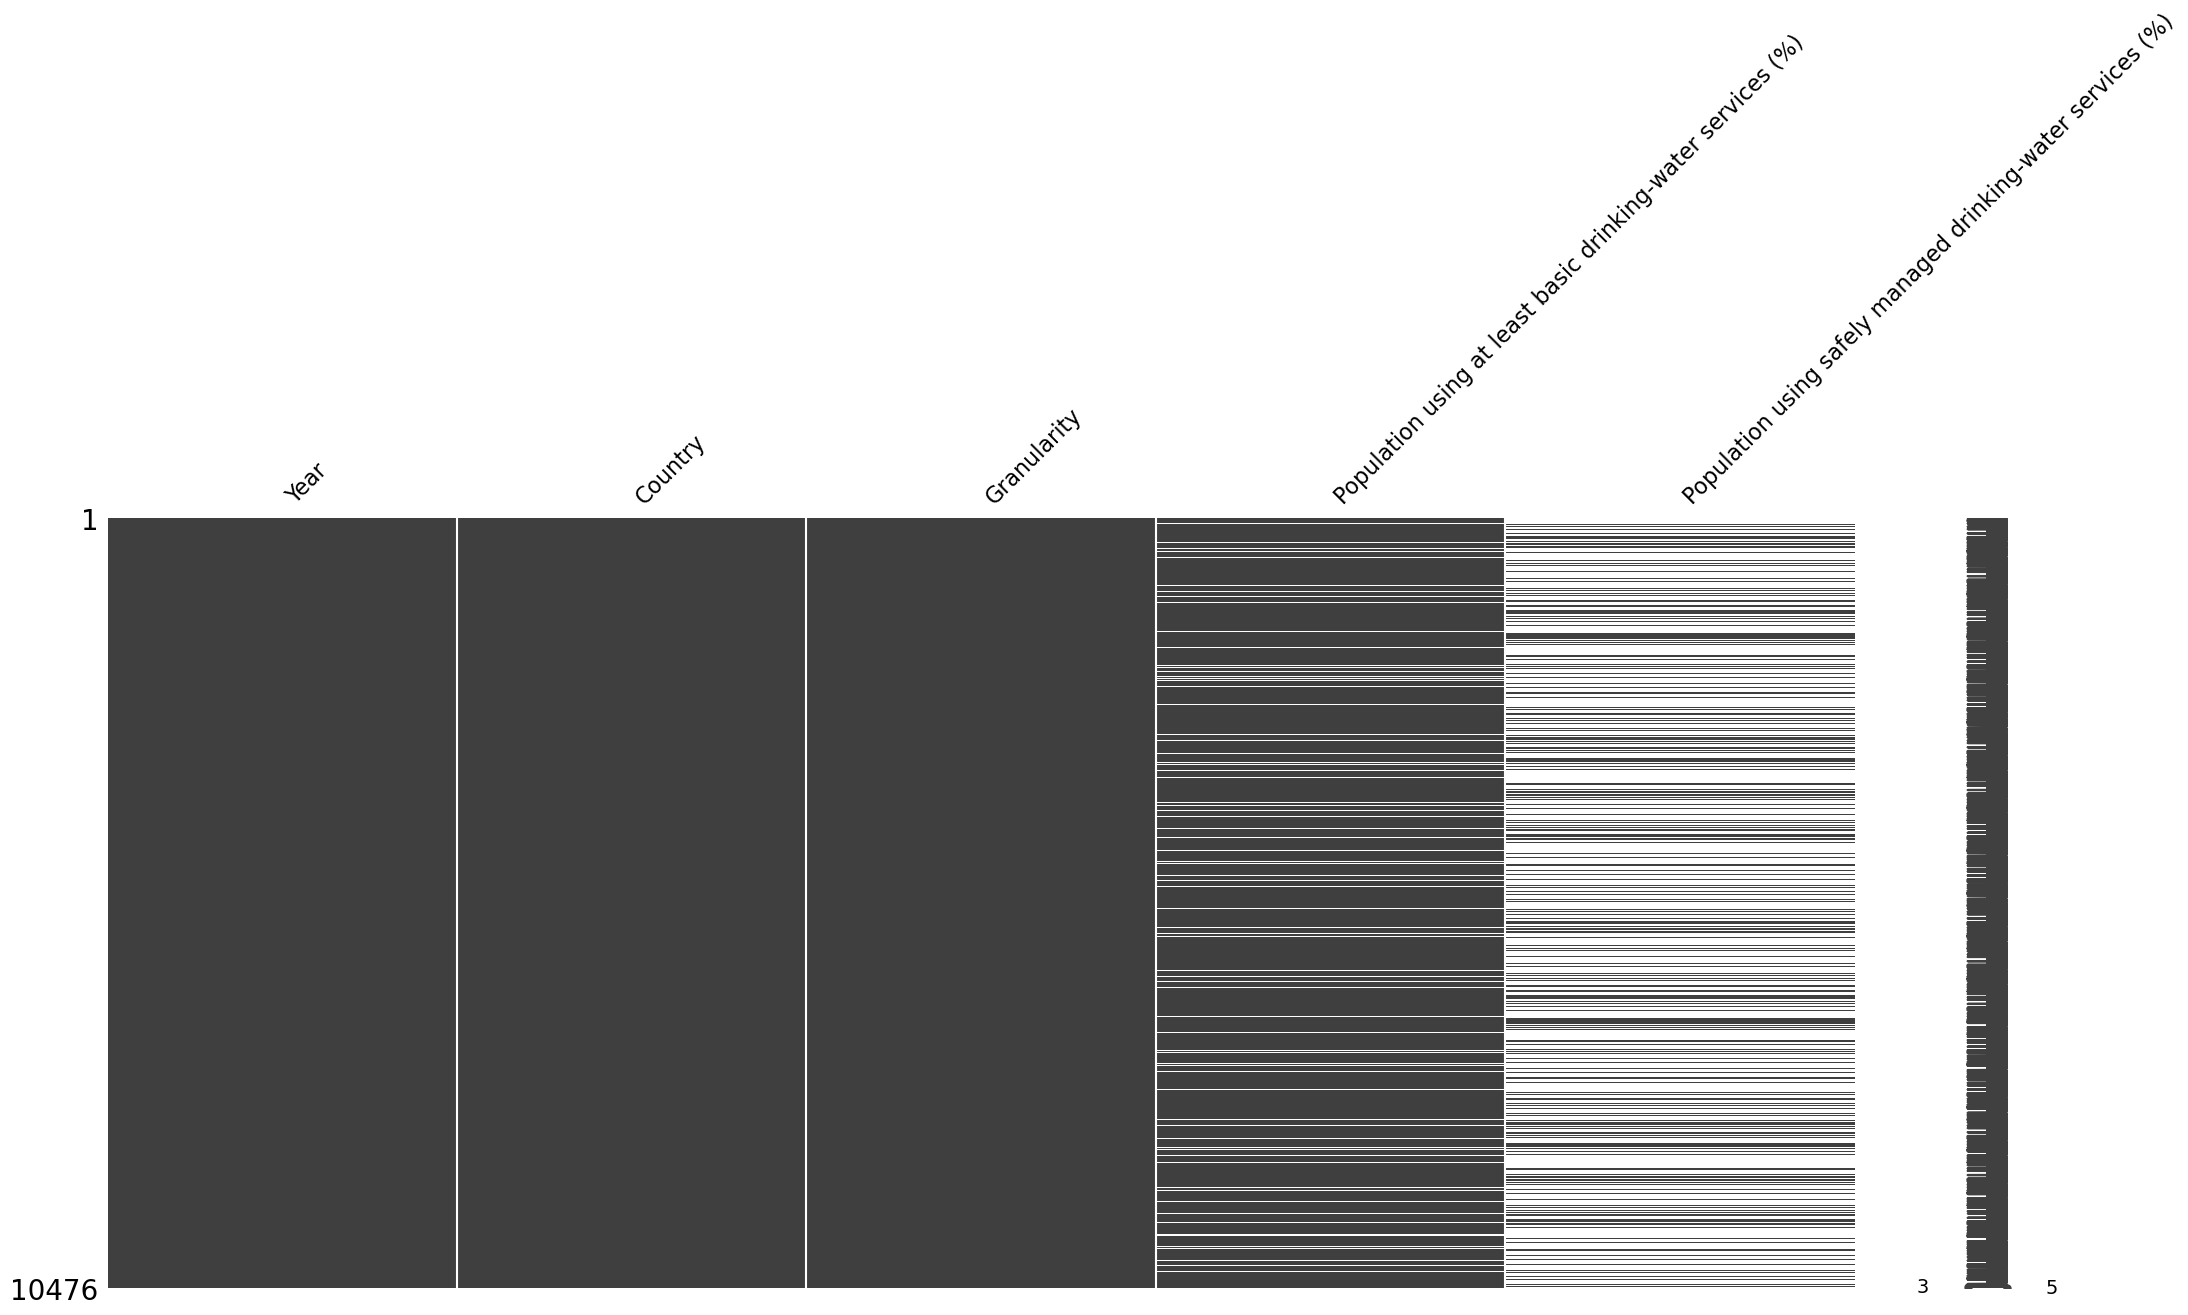

In [122]:
msno.matrix(BasicAndSafelyManagedDrinkingWaterServices)

In [123]:
# count number of null values in countries dataframe
nulls_wa = BasicAndSafelyManagedDrinkingWaterServices.isna().sum().sum()
if nulls_wa == 0:
    print("There are no null values in the table.")
else:
    print ("There are ", nulls_wa, "null values in the table.")

There are  8251 null values in the table.


In [124]:
# un-pivot data
wa_trim_1 = BasicAndSafelyManagedDrinkingWaterServices.pivot(index=['Country','Year'], columns='Granularity', values='Population using at least basic drinking-water services (%)').reset_index()
wa_trim_1.head()

Granularity,Country,Year,Rural,Total,Urban
0,Afghanistan,2000,21.619,27.772,49.487
1,Afghanistan,2001,21.619,27.797,49.487
2,Afghanistan,2002,23.600,29.901,51.904
3,Afghanistan,2003,25.581,32.005,54.321
4,Afghanistan,2004,27.561,34.126,56.739


In [125]:
# filter data
wa_trim_2 = BasicAndSafelyManagedDrinkingWaterServices.loc[BasicAndSafelyManagedDrinkingWaterServices['Granularity'] == 'Total'][['Year', 'Country', 'Population using safely managed drinking-water services (%)']]
wa_trim_2.head()

,Year,Country,Population using safely managed drinking-water services (%)
1,2000,Afghanistan,NaN
4,2000,Albania,49.293
7,2000,Algeria,NaN
10,2000,Andorra,90.640
13,2000,Angola,NaN


In [126]:
# count number of null values in countries dataframe
nulls_wa_trim_2 = wa_trim_2.isna().sum().sum()
if nulls_wa_trim_2 == 0:
    print("There are no null values in the table.")
else:
    print ("There are ", nulls_wa_trim_2, "null values in the table.")

There are  1747 null values in the table.


In [127]:
# merge data
BasicAndSafelyManagedDrinkingWaterServices_final = pd.merge(wa_trim_1, wa_trim_2, on=['Year','Country'])
BasicAndSafelyManagedDrinkingWaterServices_final.head()

,Country,Year,Rural,Total,Urban,Population using safely managed drinking-water services (%)
0,Afghanistan,2000,21.619,27.772,49.487,NaN
1,Afghanistan,2001,21.619,27.797,49.487,NaN
2,Afghanistan,2002,23.600,29.901,51.904,NaN
3,Afghanistan,2003,25.581,32.005,54.321,NaN
4,Afghanistan,2004,27.561,34.126,56.739,NaN


In [128]:
# rename columns
BasicAndSafelyManagedDrinkingWaterServices_final.rename(columns={'Country': 'p_country_name', 'Year':'p_year', 'Rural': 'water_rural_basic_%', 'Total':'total_basic_%', 'Urban': 'water_urban_basic_%',
                             "Population using safely managed drinking-water services (%)":'water_total_safe_%'}, inplace=True)
BasicAndSafelyManagedDrinkingWaterServices_final.head()

,p_country_name,p_year,water_rural_basic_%,total_basic_%,water_urban_basic_%,water_total_safe_%
0,Afghanistan,2000,21.619,27.772,49.487,NaN
1,Afghanistan,2001,21.619,27.797,49.487,NaN
2,Afghanistan,2002,23.600,29.901,51.904,NaN
3,Afghanistan,2003,25.581,32.005,54.321,NaN
4,Afghanistan,2004,27.561,34.126,56.739,NaN


In [129]:
# merge data
BasicAndSafelyManagedDrinkingWaterServices_final_2 = pd.merge(BasicAndSafelyManagedDrinkingWaterServices_final, Population_final, on=['p_country_name','p_year'])
BasicAndSafelyManagedDrinkingWaterServices_final_2.head()

,p_country_name,p_year,water_rural_basic_%,total_basic_%,water_urban_basic_%,water_total_safe_%,female_population,male_population,rural_population,urban_population
0,Afghanistan,2000,21.619,27.772,49.487,NaN,10090449,10689508,15657474,4436282
1,Afghanistan,2001,21.619,27.797,49.487,NaN,10489238,11117754,16318324,4648139
2,Afghanistan,2002,23.600,29.901,51.904,NaN,10958668,11642106,17086910,4893013
3,Afghanistan,2003,25.581,32.005,54.321,NaN,11466237,12214634,17909063,5155788
4,Afghanistan,2004,27.561,34.126,56.739,NaN,11962963,12763726,18692107,5426872


In [130]:
# add total population
BasicAndSafelyManagedDrinkingWaterServices_final_2['pop_tot'] = BasicAndSafelyManagedDrinkingWaterServices_final_2['female_population'] + BasicAndSafelyManagedDrinkingWaterServices_final_2['male_population']
BasicAndSafelyManagedDrinkingWaterServices_final_2.head()

,p_country_name,p_year,water_rural_basic_%,total_basic_%,water_urban_basic_%,water_total_safe_%,female_population,male_population,rural_population,urban_population,pop_tot
0,Afghanistan,2000,21.619,27.772,49.487,NaN,10090449,10689508,15657474,4436282,20779957
1,Afghanistan,2001,21.619,27.797,49.487,NaN,10489238,11117754,16318324,4648139,21606992
2,Afghanistan,2002,23.600,29.901,51.904,NaN,10958668,11642106,17086910,4893013,22600774
3,Afghanistan,2003,25.581,32.005,54.321,NaN,11466237,12214634,17909063,5155788,23680871
4,Afghanistan,2004,27.561,34.126,56.739,NaN,11962963,12763726,18692107,5426872,24726689


In [131]:
# add calculations
BasicAndSafelyManagedDrinkingWaterServices_final_2['water_rural_basic_mio'] = round((BasicAndSafelyManagedDrinkingWaterServices_final_2['water_rural_basic_%'] / 100) * BasicAndSafelyManagedDrinkingWaterServices_final_2['rural_population'], 0)
BasicAndSafelyManagedDrinkingWaterServices_final_2['water_urban_basic_mio'] = round((BasicAndSafelyManagedDrinkingWaterServices_final_2['water_urban_basic_%'] / 100) * BasicAndSafelyManagedDrinkingWaterServices_final_2['urban_population'], 0)
BasicAndSafelyManagedDrinkingWaterServices_final_2['total_basic_mio'] = round((BasicAndSafelyManagedDrinkingWaterServices_final_2['total_basic_%'] / 100) * BasicAndSafelyManagedDrinkingWaterServices_final_2['pop_tot'], 0)
BasicAndSafelyManagedDrinkingWaterServices_final_2['water_total_safe_mio'] = round((BasicAndSafelyManagedDrinkingWaterServices_final_2['water_total_safe_%'] / 100) * BasicAndSafelyManagedDrinkingWaterServices_final_2['pop_tot'], 0)
BasicAndSafelyManagedDrinkingWaterServices_final_2.head()

,p_country_name,p_year,water_rural_basic_%,total_basic_%,water_urban_basic_%,water_total_safe_%,female_population,male_population,rural_population,urban_population,pop_tot,water_rural_basic_mio,water_urban_basic_mio,total_basic_mio,water_total_safe_mio
0,Afghanistan,2000,21.619,27.772,49.487,NaN,10090449,10689508,15657474,4436282,20779957,3385010.000,2195403.000,5770989.000,NaN
1,Afghanistan,2001,21.619,27.797,49.487,NaN,10489238,11117754,16318324,4648139,21606992,3527880.000,2300245.000,6006152.000,NaN
2,Afghanistan,2002,23.600,29.901,51.904,NaN,10958668,11642106,17086910,4893013,22600774,4032490.000,2539692.000,6757803.000,NaN
3,Afghanistan,2003,25.581,32.005,54.321,NaN,11466237,12214634,17909063,5155788,23680871,4581251.000,2800701.000,7579079.000,NaN
4,Afghanistan,2004,27.561,34.126,56.739,NaN,11962963,12763726,18692107,5426872,24726689,5151803.000,3079126.000,8438287.000,NaN


In [132]:
BasicAndSafelyManagedDrinkingWaterServices_final_2.head()

,p_country_name,p_year,water_rural_basic_%,total_basic_%,water_urban_basic_%,water_total_safe_%,female_population,male_population,rural_population,urban_population,pop_tot,water_rural_basic_mio,water_urban_basic_mio,total_basic_mio,water_total_safe_mio
0,Afghanistan,2000,21.619,27.772,49.487,NaN,10090449,10689508,15657474,4436282,20779957,3385010.000,2195403.000,5770989.000,NaN
1,Afghanistan,2001,21.619,27.797,49.487,NaN,10489238,11117754,16318324,4648139,21606992,3527880.000,2300245.000,6006152.000,NaN
2,Afghanistan,2002,23.600,29.901,51.904,NaN,10958668,11642106,17086910,4893013,22600774,4032490.000,2539692.000,6757803.000,NaN
3,Afghanistan,2003,25.581,32.005,54.321,NaN,11466237,12214634,17909063,5155788,23680871,4581251.000,2800701.000,7579079.000,NaN
4,Afghanistan,2004,27.561,34.126,56.739,NaN,11962963,12763726,18692107,5426872,24726689,5151803.000,3079126.000,8438287.000,NaN


In [133]:
# reorder columns
BasicAndSafelyManagedDrinkingWaterServices_final = BasicAndSafelyManagedDrinkingWaterServices_final_2[['p_country_name','p_year','pop_tot', 'water_rural_basic_mio','water_urban_basic_mio','total_basic_mio','water_total_safe_mio']].copy() 
BasicAndSafelyManagedDrinkingWaterServices_final.head()

,p_country_name,p_year,pop_tot,water_rural_basic_mio,water_urban_basic_mio,total_basic_mio,water_total_safe_mio
0,Afghanistan,2000,20779957,3385010.000,2195403.000,5770989.000,NaN
1,Afghanistan,2001,21606992,3527880.000,2300245.000,6006152.000,NaN
2,Afghanistan,2002,22600774,4032490.000,2539692.000,6757803.000,NaN
3,Afghanistan,2003,23680871,4581251.000,2800701.000,7579079.000,NaN
4,Afghanistan,2004,24726689,5151803.000,3079126.000,8438287.000,NaN


In [134]:
# type casting - attn cannot type cast if column contains NaNs
BasicAndSafelyManagedDrinkingWaterServices_final['p_country_name'] = BasicAndSafelyManagedDrinkingWaterServices_final['p_country_name'].astype('string')
BasicAndSafelyManagedDrinkingWaterServices_final_2['p_country_name'] = BasicAndSafelyManagedDrinkingWaterServices_final_2['p_country_name'].astype('string')

In [135]:
# rename columns
BasicAndSafelyManagedDrinkingWaterServices_final.rename(columns={'p_country_name': 'dw_country_name', 'p_year':'dw_year'}, inplace=True)
BasicAndSafelyManagedDrinkingWaterServices_final.head()

,dw_country_name,dw_year,pop_tot,water_rural_basic_mio,water_urban_basic_mio,total_basic_mio,water_total_safe_mio
0,Afghanistan,2000,20779957,3385010.000,2195403.000,5770989.000,NaN
1,Afghanistan,2001,21606992,3527880.000,2300245.000,6006152.000,NaN
2,Afghanistan,2002,22600774,4032490.000,2539692.000,6757803.000,NaN
3,Afghanistan,2003,23680871,4581251.000,2800701.000,7579079.000,NaN
4,Afghanistan,2004,24726689,5151803.000,3079126.000,8438287.000,NaN


In [136]:
# rename columns
BasicAndSafelyManagedDrinkingWaterServices_final_2.rename(columns={'p_country_name': 'dw_country_name', 'p_year':'dw_year'}, inplace=True)
BasicAndSafelyManagedDrinkingWaterServices_final_2.head()

,dw_country_name,dw_year,water_rural_basic_%,total_basic_%,water_urban_basic_%,water_total_safe_%,female_population,male_population,rural_population,urban_population,pop_tot,water_rural_basic_mio,water_urban_basic_mio,total_basic_mio,water_total_safe_mio
0,Afghanistan,2000,21.619,27.772,49.487,NaN,10090449,10689508,15657474,4436282,20779957,3385010.000,2195403.000,5770989.000,NaN
1,Afghanistan,2001,21.619,27.797,49.487,NaN,10489238,11117754,16318324,4648139,21606992,3527880.000,2300245.000,6006152.000,NaN
2,Afghanistan,2002,23.600,29.901,51.904,NaN,10958668,11642106,17086910,4893013,22600774,4032490.000,2539692.000,6757803.000,NaN
3,Afghanistan,2003,25.581,32.005,54.321,NaN,11466237,12214634,17909063,5155788,23680871,4581251.000,2800701.000,7579079.000,NaN
4,Afghanistan,2004,27.561,34.126,56.739,NaN,11962963,12763726,18692107,5426872,24726689,5151803.000,3079126.000,8438287.000,NaN


In [137]:
# export df to csv file
BasicAndSafelyManagedDrinkingWaterServices_final_2.to_csv("RESULTATS/BasicAndSafelyManagedDrinkingWaterServices_final_2.csv", index=False,encoding='utf-8-sig')
BasicAndSafelyManagedDrinkingWaterServices_final.to_csv("RESULTATS/BasicAndSafelyManagedDrinkingWaterServices_final.csv", index=False,encoding='utf-8-sig')

## 5 - MortalityRateAttributedToWater

In [100]:
# import file - source : 
MortalityRateAttributedToWater = pd.read_csv('RESSOURCES/MortalityRateAttributedToWater.csv',sep=",")
MortalityRateAttributedToWater.describe()

,Year,Mortality rate attributed to exposure to unsafe WASH services,WASH deaths
count,549.000,549.000,183.000
mean,2016.000,12.494,4756.098
std,0.000,20.831,21280.125
min,2016.000,0.004,0.082
25%,2016.000,0.193,11.163
50%,2016.000,1.289,130.983
75%,2016.000,18.055,1950.434
max,2016.000,107.048,246087.900


<Axes: >

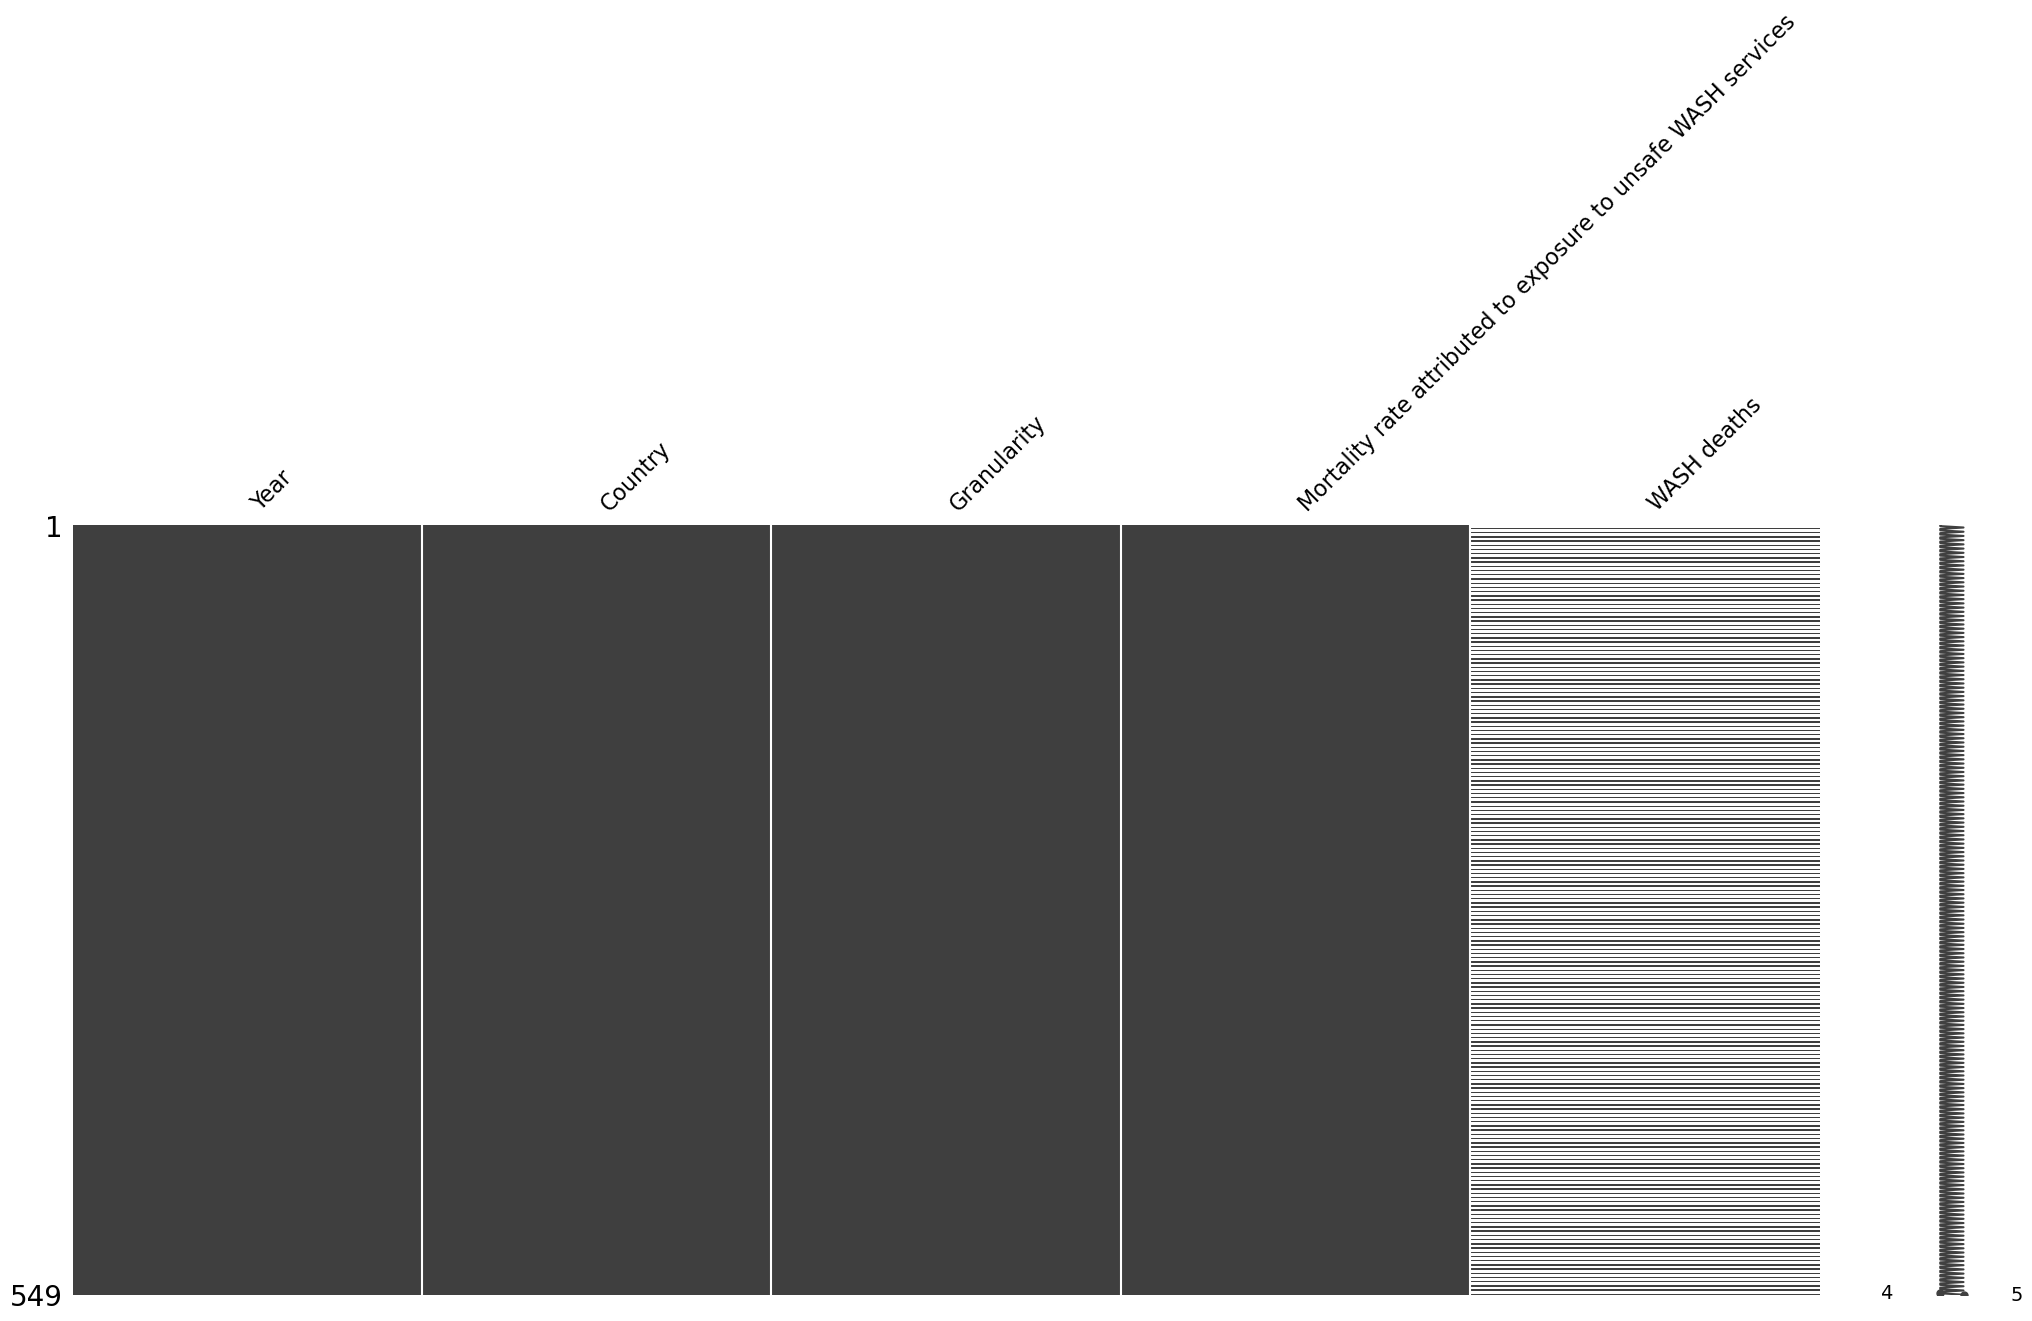

In [101]:
msno.matrix(MortalityRateAttributedToWater)

In [102]:
# count number of null values in countries dataframe
nulls_wm = MortalityRateAttributedToWater.isna().sum().sum()
if nulls_wm == 0:
    print("There are no null values in the table.")
else:
    print ("There are ", nulls_wm, "null values in the table.")

There are  366 null values in the table.


In [103]:
# un-pivot data
wm_trim_1 = MortalityRateAttributedToWater.pivot(index=['Country','Year'], columns='Granularity', values='Mortality rate attributed to exposure to unsafe WASH services').reset_index()
wm_trim_1.head()

Granularity,Country,Year,Female,Male,Total
0,Afghanistan,2016,15.312,12.613,13.921
1,Albania,2016,0.126,0.206,0.166
2,Algeria,2016,2.199,1.728,1.867
3,Angola,2016,45.150,52.625,48.815
4,Antigua and Barbuda,2016,0.104,0.125,0.114


In [104]:
# filter data
wm_trim_2 = MortalityRateAttributedToWater.loc[MortalityRateAttributedToWater['Granularity'] == 'Total'][['Year', 'Country', 'WASH deaths']]
wm_trim_2.head()

,Year,Country,WASH deaths
2,2016,Afghanistan,4824.353
5,2016,Albania,4.870
8,2016,Algeria,758.210
11,2016,Angola,14065.200
14,2016,Antigua and Barbuda,0.115


In [105]:
# merge data
wm_trim_final = pd.merge(wm_trim_1, wm_trim_2, on=['Country','Year'])
wm_trim_final.rename(columns={'Female': 'Female_per100k', 'Male':'Male_per100k', 'Total':'Total_per100k'}, inplace=True)
wm_trim_final.head()

,Country,Year,Female_per100k,Male_per100k,Total_per100k,WASH deaths
0,Afghanistan,2016,15.312,12.613,13.921,4824.353
1,Albania,2016,0.126,0.206,0.166,4.870
2,Algeria,2016,2.199,1.728,1.867,758.210
3,Angola,2016,45.150,52.625,48.815,14065.200
4,Antigua and Barbuda,2016,0.104,0.125,0.114,0.115


In [107]:
# filter data and rename columns
Population_2016 = Population_final.loc[Population_final['p_year'] == 2016].copy()
Population_2016.rename(columns={'p_country_name': 'Country', 'p_year':'Year'}, inplace=True)
Population_2016.head()

Granularity,Country,Year,female_population,male_population,rural_population,urban_population
16,Afghanistan,2016,17196034,18186994,25985093,8670939
35,Albania,2016,1415879,1470548,1216737,1709611
54,Algeria,2016,20069497,20481901,11589537,29016515
111,Angola,2016,14576127,14266355,10329860,18483603
149,Antigua and Barbuda,2016,49002,45518,75878,25085


In [109]:
# merge data
wm_trim_final_2 = pd.merge(wm_trim_final, Population_2016, on=['Country','Year'])
wm_trim_final_2.head()

,Country,Year,Female_per100k,Male_per100k,Total_per100k,WASH deaths,female_population,male_population,rural_population,urban_population
0,Afghanistan,2016,15.312,12.613,13.921,4824.353,17196034,18186994,25985093,8670939
1,Albania,2016,0.126,0.206,0.166,4.870,1415879,1470548,1216737,1709611
2,Algeria,2016,2.199,1.728,1.867,758.210,20069497,20481901,11589537,29016515
3,Angola,2016,45.150,52.625,48.815,14065.200,14576127,14266355,10329860,18483603
4,Antigua and Barbuda,2016,0.104,0.125,0.114,0.115,49002,45518,75878,25085


In [110]:
# add calculations
wm_trim_final_2['female_wash_deaths'] = wm_trim_final_2['Female_per100k'] * wm_trim_final_2['female_population'] / 100000
wm_trim_final_2['male_wash_deaths'] = wm_trim_final_2['Male_per100k'] * wm_trim_final_2['male_population'] / 100000
wm_trim_final_2['total_deaths'] = wm_trim_final_2['female_wash_deaths'] + wm_trim_final_2['male_wash_deaths']
wm_trim_final_2.head()

,Country,Year,Female_per100k,Male_per100k,Total_per100k,WASH deaths,female_population,male_population,rural_population,urban_population,female_wash_deaths,male_wash_deaths,total_deaths
0,Afghanistan,2016,15.312,12.613,13.921,4824.353,17196034,18186994,25985093,8670939,2633.045,2293.920,4926.965
1,Albania,2016,0.126,0.206,0.166,4.870,1415879,1470548,1216737,1709611,1.777,3.037,4.814
2,Algeria,2016,2.199,1.728,1.867,758.210,20069497,20481901,11589537,29016515,441.308,354.003,795.311
3,Angola,2016,45.150,52.625,48.815,14065.200,14576127,14266355,10329860,18483603,6581.156,7507.678,14088.834
4,Antigua and Barbuda,2016,0.104,0.125,0.114,0.115,49002,45518,75878,25085,0.051,0.057,0.108


In [114]:
# filter data and rename columns
MortalityRateAttributedToWater_2016_final = wm_trim_final_2[['Country', 'WASH deaths' ,'female_wash_deaths','male_wash_deaths', "Total_per100k","Male_per100k","Female_per100k"]].copy()
MortalityRateAttributedToWater_2016_final.rename(columns={'Country': 'wm_country_name', 'WASH deaths':'total_deaths', 'female_wash_deaths':'female_deaths','male_wash_deaths':'male_deaths'}, inplace=True)
MortalityRateAttributedToWater_2016_final.head()

,wm_country_name,total_deaths,female_deaths,male_deaths,Total_per100k,Male_per100k,Female_per100k
0,Afghanistan,4824.353,2633.045,2293.920,13.921,12.613,15.312
1,Albania,4.870,1.777,3.037,0.166,0.206,0.126
2,Algeria,758.210,441.308,354.003,1.867,1.728,2.199
3,Angola,14065.200,6581.156,7507.678,48.815,52.625,45.150
4,Antigua and Barbuda,0.115,0.051,0.057,0.114,0.125,0.104


In [115]:
# export df to csv file
wm_trim_final_2.to_csv("RESULTATS/MortalityRateAttributedToWater_2016_final_2.csv", index=False,encoding='utf-8-sig')
MortalityRateAttributedToWater_2016_final.to_csv("RESULTATS/MortalityRateAttributedToWater_2016_final.csv", index=False,encoding='utf-8-sig')

## 6 - Merge data tables

#### 6.1 - Table fao_data

In [138]:
# rename columns
PoliticalStability_final.rename(columns={'ps_country_name': 'p_country_name', 'ps_year':'p_year'}, inplace=True)
PoliticalStability_final.head()

,p_country_name,p_year,political_stability
0,Afghanistan,2000,-2.440
1,Afghanistan,2002,-2.040
2,Afghanistan,2003,-2.200
3,Afghanistan,2004,-2.300
4,Afghanistan,2005,-2.070


In [147]:
print(MortalityRateAttributedToWater_2016_final.columns)

Index(['wm_country_name', 'total_deaths', 'female_deaths', 'male_deaths',
       'Total_per100k', 'Male_per100k', 'Female_per100k'],
      dtype='object')


In [150]:
print(wm_trim_final_2.columns)

Index(['Country', 'Year', 'Female_per100k', 'Male_per100k', 'Total_per100k',
       'WASH deaths', 'female_population', 'male_population',
       'rural_population', 'urban_population', 'female_wash_deaths',
       'male_wash_deaths', 'total_deaths'],
      dtype='object')


In [143]:
# Fusionner les DataFrames en utilisant les bonnes colonnes
fao_data = pd.merge(
    BasicAndSafelyManagedDrinkingWaterServices_final_2, 
    PoliticalStability_final, 
    how='left', 
    left_on=['dw_country_name', 'dw_year'], 
    right_on=['p_country_name', 'p_year']
)[['dw_country_name', 'dw_year', 'water_rural_basic_%', 'total_basic_%',
       'water_urban_basic_%', 'water_total_safe_%', 'female_population',
       'male_population', 'rural_population', 'urban_population', 'pop_tot', 'political_stability', 'water_rural_basic_mio', 'water_urban_basic_mio', 'total_basic_mio',
       'water_total_safe_mio']]

# Renommer les colonnes pour harmoniser les noms
fao_data.rename(columns={
    'dw_country_name': 'fao_country_name', 
    'dw_year': 'fao_year', 
    'water_rural_basic_mio': 'water_rural_basic', 
    'water_urban_basic_mio': 'water_urban_basic', 
    'water_total_safe_mio': 'water_total_safe'
}, inplace=True)

# Remplacer les valeurs manquantes par des zéros
fao_data.fillna(0, inplace=True)

# Afficher les premières lignes du DataFrame résultant
fao_data.head()


,fao_country_name,fao_year,water_rural_basic_%,total_basic_%,water_urban_basic_%,water_total_safe_%,female_population,male_population,rural_population,urban_population,pop_tot,political_stability,water_rural_basic,water_urban_basic,total_basic_mio,water_total_safe
0,Afghanistan,2000,21.619,27.772,49.487,0.000,10090449,10689508,15657474,4436282,20779957,-2.440,3385010.000,2195403.000,5770989.000,0.000
1,Afghanistan,2001,21.619,27.797,49.487,0.000,10489238,11117754,16318324,4648139,21606992,0.000,3527880.000,2300245.000,6006152.000,0.000
2,Afghanistan,2002,23.600,29.901,51.904,0.000,10958668,11642106,17086910,4893013,22600774,-2.040,4032490.000,2539692.000,6757803.000,0.000
3,Afghanistan,2003,25.581,32.005,54.321,0.000,11466237,12214634,17909063,5155788,23680871,-2.200,4581251.000,2800701.000,7579079.000,0.000
4,Afghanistan,2004,27.561,34.126,56.739,0.000,11962963,12763726,18692107,5426872,24726689,-2.300,5151803.000,3079126.000,8438287.000,0.000


In [144]:
# export df to csv file
fao_data.to_csv("RESULTATS/fao_data.csv", index=False,encoding='utf-8-sig')

#### 6.2 - Table wash_mortality_2016

In [84]:
wash_mortality_2016 = wash_deaths_2016_final[['wm_country_name', 'female_deaths', 'male_deaths']]
wash_mortality_2016.head()

,wm_country_name,female_deaths,male_deaths
0,Afghanistan,2633.045,2293.920
1,Albania,1.777,3.037
2,Algeria,441.308,354.003
3,Angola,6581.156,7507.678
4,Antigua and Barbuda,0.051,0.057


In [85]:
# export df to csv file
wash_mortality_2016.to_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/DWFA_wash_mortality_2016.csv', index=False, encoding='latin_1')

In [86]:
# load csv file into db
load_wash_mortality_2016 = "LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/DWFA_wash_mortality_2016.csv' INTO TABLE wash_mortality_2016 CHARACTER SET latin1 FIELDS TERMINATED BY ',' LINES TERMINATED BY '\r\n' IGNORE 1 ROWS"
cursor.execute("SET FOREIGN_KEY_CHECKS=0")
cursor.execute(load_wash_mortality_2016)
cursor.execute("SET FOREIGN_KEY_CHECKS=1")

In [88]:
# replace missing values with zeros
update_fao_data_1 = "UPDATE fao_data SET water_total_safe=NULL WHERE water_total_safe=0"
update_fao_data_2 = "UPDATE fao_data SET political_stability=NULL WHERE political_stability=0"
update_fao_data_3 = "UPDATE fao_data SET water_rural_basic=NULL WHERE water_rural_basic=0"
update_fao_data_4 = "UPDATE fao_data SET water_urban_basic=NULL WHERE water_urban_basic=0"
cursor.execute(update_fao_data_1)
cursor.execute(update_fao_data_2)
cursor.execute(update_fao_data_3)
cursor.execute(update_fao_data_4)

In [89]:
# close connection
connection.close()

In [152]:
# count number of null values in countries dataframe
nulls_fao_data = MortalityRateAttributedToWater_2016_final.isna().sum().sum()
if nulls_fao_data == 0:
    print("There are no null values in the table.")
else:
    print ("There are ", nulls_fao_data, "null values in the table.")

There are no null values in the table.


In [153]:
MortalityRateAttributedToWater_2016_final.shape

(182, 7)

In [154]:
wm_trim_final_2.shape

(182, 13)